# **Importing the Dependencies**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

## Data Collection and Processing

In [ ]:
# load the dataset to a pandas dataframe
data = pd.read_csv("/content/Rainfall.csv")
print(data.head())

   day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   cloud   \
0    1     1025.9     19.9         18.3     16.8      13.1         72      49   
1    2     1022.0     21.7         18.9     17.2      15.6         81      83   
2    3     1019.7     20.3         19.3     18.0      18.4         95      91   
3    4     1018.9     22.3         20.6     19.1      18.8         90      88   
4    5     1015.9     21.3         20.7     20.2      19.9         95      81   

  rainfall  sunshine           winddirection  windspeed  
0      yes       9.3                    80.0       26.3  
1      yes       0.6                    50.0       15.3  
2      yes       0.0                    40.0       14.2  
3      yes       1.0                    50.0       16.9  
4      yes       0.0                    40.0       13.7  


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.shape

(366, 12)

In [ ]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
print("data Info:")
data.info()

data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
# remove extra spaces  in all columns
data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
print("data Info:")
data.info()

data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data =  data.drop(columns =  ["day"])

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
# chenking the number of missing values
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [ ]:
# Handle missing data
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [ ]:
# chenking the number of missing values
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [ ]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Converting yes and no to 1 and 0 respectively
data["rainfall"] = data["rainfall"].map({"yes": 1, "no": 0})

In [ ]:
data["rainfall"].unique()

array([1, 0])

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


# **Exploratory Data Analysis (EDA)**

In [ ]:
data.shape

(366, 11)

In [ ]:
# setting plot style for all the plots
sns.set(style = "whitegrid")

In [ ]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [ ]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

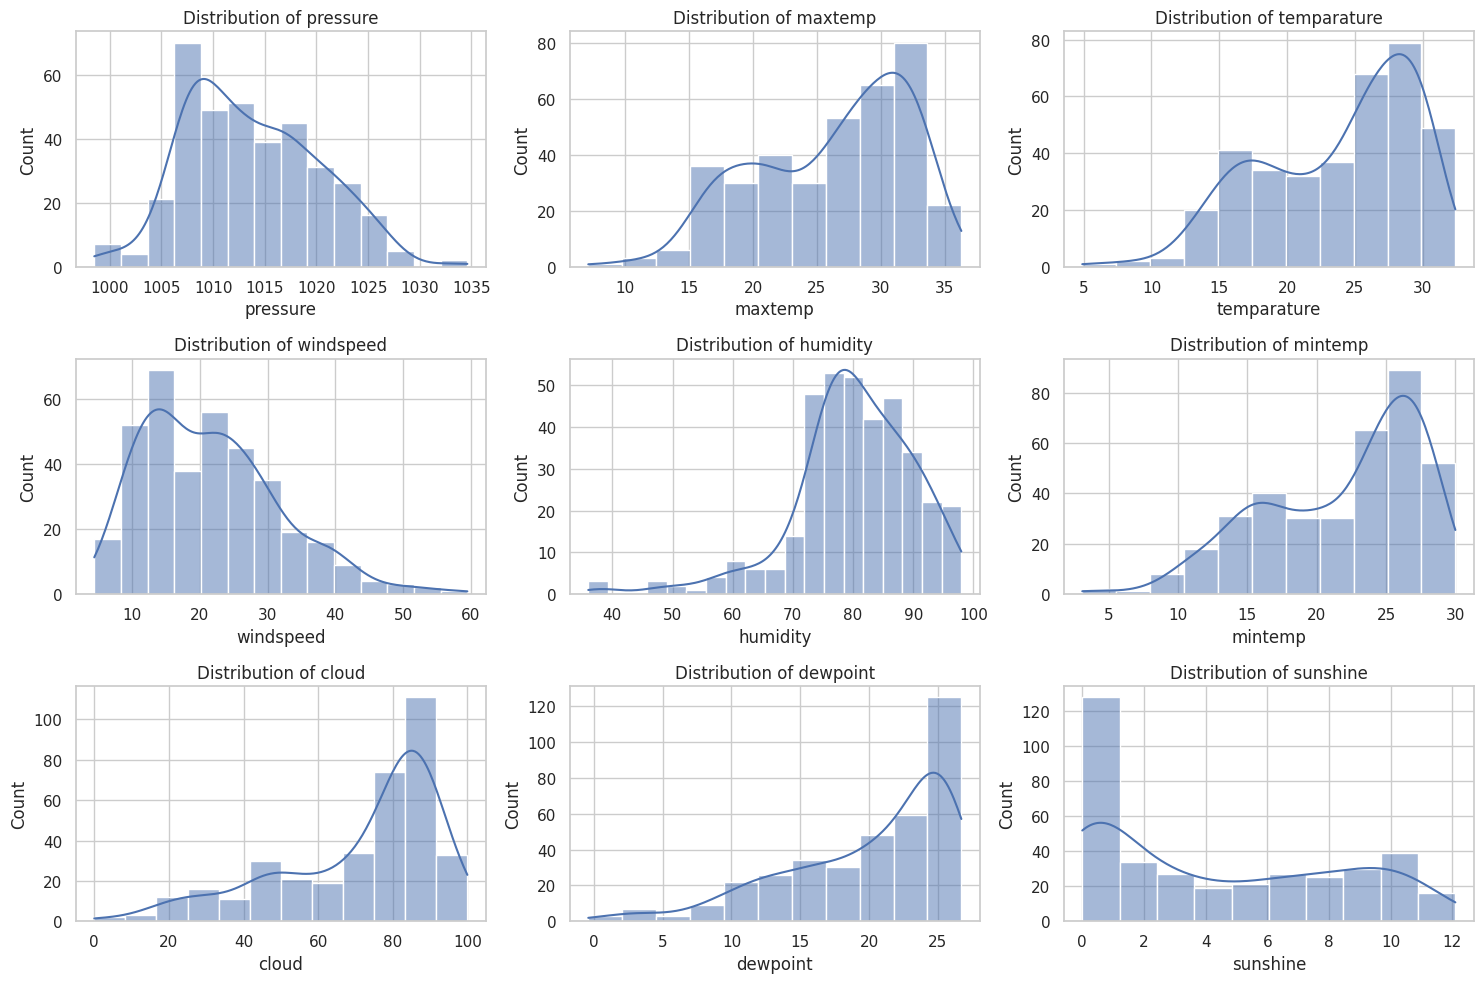

In [ ]:
plt.figure(figsize = (15, 10))

for i, columns in enumerate(['pressure','maxtemp','temparature','windspeed','humidity','mintemp','cloud','dewpoint','sunshine'],1):
  plt.subplot(3, 3, i)
  sns.histplot(data[columns], kde = True)
  plt.title(f"Distribution of {columns}")

plt.tight_layout()
plt.show()

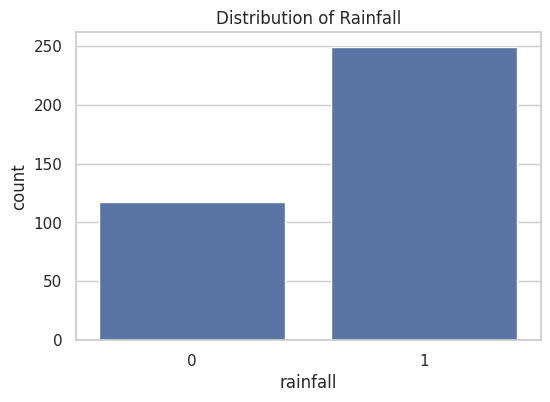

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(x = data["rainfall"])
plt.title("Distribution of Rainfall")
plt.show()

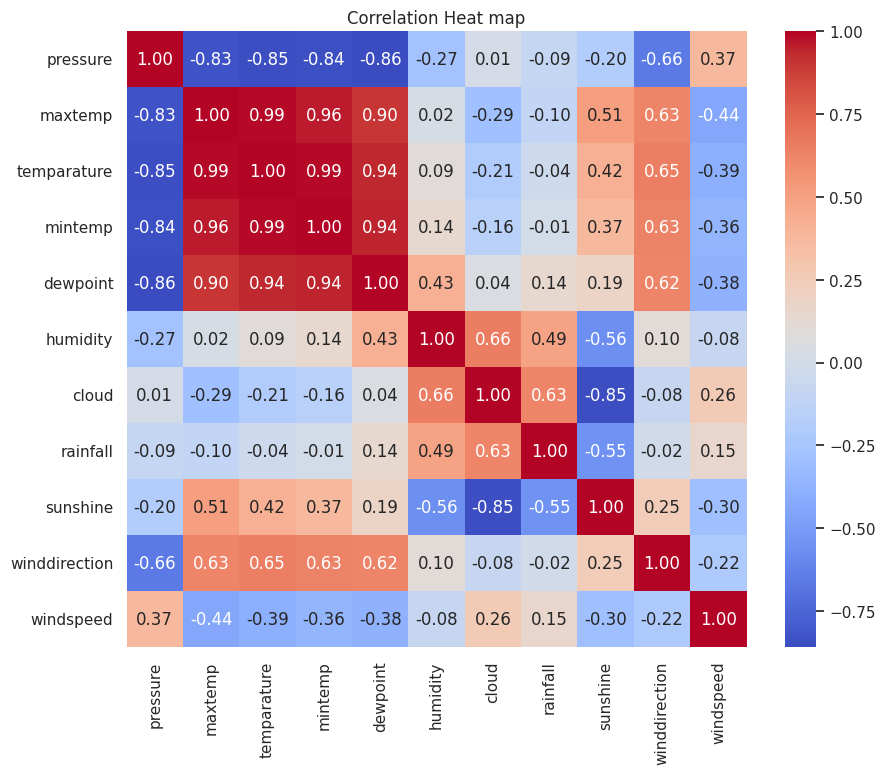

In [ ]:
# correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm",fmt = ".2f")
plt.title("Correlation Heat map")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

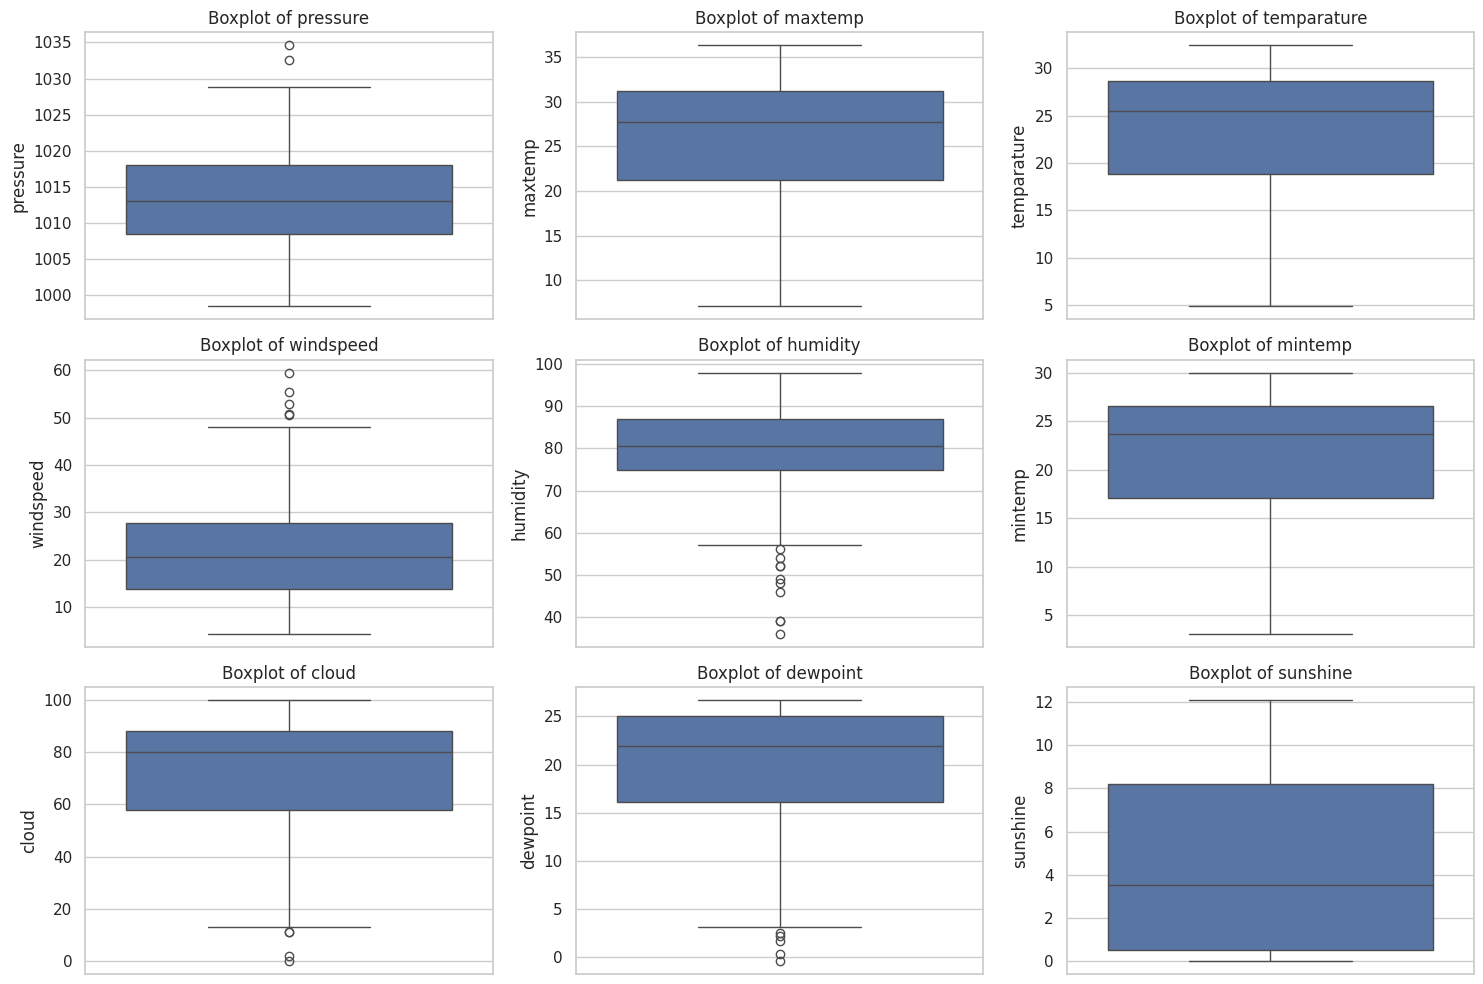

In [ ]:
plt.figure(figsize = (15,10))

for i ,columns in enumerate(['pressure','maxtemp','temparature','windspeed','humidity','mintemp','cloud','dewpoint','sunshine'],1):
  plt.subplot(3,3,i)
  sns.boxplot(data[columns])
  plt.title(f"Boxplot of {columns}")

plt.tight_layout()
plt.show

In [ ]:
for column in ['pressure', 'maxtemp', 'temparature', 'windspeed', 'humidity', 'mintemp', 'cloud', 'dewpoint', 'sunshine']:
    if column in data.columns:  # Ensure the column exists
        # Calculate Q1, Q3, and IQR
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]

         # Count the number of outliers
        outlier_count = outliers.count()

        # Print the results
        print(f"Column '{column}':")
        print(f"  Outliers: {outliers.tolist()}")
        print(f"  Total number of outliers: {outlier_count}\n")
    else:
        print(f"Column '{column}' not found in the dataset.")

Column 'pressure':
  Outliers: [1034.6, 1032.6]
  Total number of outliers: 2

Column 'maxtemp':
  Outliers: []
  Total number of outliers: 0

Column 'temparature':
  Outliers: []
  Total number of outliers: 0

Column 'windspeed':
  Outliers: [50.6, 55.5, 59.5, 52.8, 50.7]
  Total number of outliers: 5

Column 'humidity':
  Outliers: [46, 39, 36, 52, 54, 56, 52, 49, 39, 48]
  Total number of outliers: 10

Column 'mintemp':
  Outliers: []
  Total number of outliers: 0

Column 'cloud':
  Outliers: [2, 0, 11, 11]
  Total number of outliers: 4

Column 'dewpoint':
  Outliers: [2.2, 2.5, 0.3, 1.7, -0.4]
  Total number of outliers: 5

Column 'sunshine':
  Outliers: []
  Total number of outliers: 0



# **Data Preprocessing**

In [ ]:
# Drop correleted column
data = data.drop(columns = ['mintemp', 'temparature','maxtemp'])

In [ ]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [ ]:
# seperate majority and minority class
df_majority = data[data["rainfall"] == 1]
df_minority = data[data["rainfall"] == 0]

In [ ]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [ ]:
# DownSample majority class to match the minority count

df_majority_downsampled = resample(df_majority,
                                  replace = False,
                                  n_samples = len(df_minority),
                                  random_state = 42)

In [ ]:
df_majority_downsampled.shape

(117, 8)

In [ ]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
df_downsampled.shape

(234, 8)

In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [ ]:
# shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac = 1, random_state = 42).reset_index(drop = True)


In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
# Split feature and target as X and y
X = df_downsampled.drop(columns = ["rainfall"])
y = df_downsampled["rainfall"]

In [ ]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [ ]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [ ]:
# Splitting the data into Training and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Model Training**

In [ ]:
rf_model = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators': [50,100,200],
    'max_features': ['sqrt','log2',None],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [ ]:
# Hyper parameter tuning using GirdSearchCV
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameters for Random Forest:",grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


# **Model Evaluation**

In [ ]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv = 5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean cross-validation score: 0.818918918918919


In [ ]:
# test set performance
y_pred = best_rf_model.predict(X_test)

print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Test Accuracy : 0.7446808510638298
Confusion Matrix :
 [[17  7]
 [ 5 18]]
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



# **Prediction on unknown data**

In [ ]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)

input_df = pd.DataFrame([input_data],columns =['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [ ]:
prediction = best_rf_model.predict(input_df)
print(prediction)

[1]


In [ ]:
prediction[0]

1

In [ ]:
print("prediction Result :","rainfall" if prediction[0] == 1 else "no rainfall")

prediction Result : rainfall


In [ ]:
# Same model and feature names to a pickle file
model_data ={"model": best_rf_model,"feature_names": X_train.columns.tolist()}

with open("rainfall_prediction_model.pkl","wb") as file:
  pickle.dump(model_data,file)

# **Load the saved model and file and use it for prediction**

In [ ]:
import pickle
import pandas as pd

In [ ]:
# load the trained model and feature names from pickle file
with open("rainfall_prediction_model.pkl","rb") as file:
  model_data = pickle.load(file)

In [ ]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [ ]:
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)

input_df = pd.DataFrame([input_data],columns =feature_names)


In [ ]:
prediction = best_rf_model.predict(input_df)
print("prediction Result :","rainfall" if prediction[0] == 1 else "no rainfall")

prediction Result : rainfall


# **SMOTE for Class Balancing**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after applying SMOTE:")
print(y_resampled.value_counts())


Class distribution after applying SMOTE:
rainfall
0    85
1    85
Name: count, dtype: int64


# **PCA for Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Feature scaling before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Applying PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by PCA components:")
print(pca.explained_variance_ratio_)

Explained variance ratio by PCA components:
[0.41148718 0.34941576]


# **Logistic Regression with Feature Scaling**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define model and parameters
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_s

# **Logistic Regression with Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameter grid
log_reg = LogisticRegression(random_state=42)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.1, 1, 10, 100],                        # Inverse regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],      # Solvers
    'max_iter': [100, 500, 1000]                   # Maximum iterations
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Test the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate performance
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=10, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_i

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
420 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/